## TODO

- EDA - check the dataset, nulls, collumns, shape
- Clean database

In [74]:
import pandas as pd

df = pd.read_csv('../src/taxipred/data/taxi_trip_pricing.csv')

SAVE_VIS_PATH = '../src/taxipred/visualization'
SAVE_DATA_PATH = '../src/taxipred/processed_data'

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [3]:
df.info(), df.shape

# 1000 rows 11 columns
# 950 rows on most columns is non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


(None, (1000, 11))

In [4]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [5]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [6]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [7]:
df['Day_of_Week'].value_counts()
df['Weather'].value_counts()
df['Traffic_Conditions'].value_counts()
df['Time_of_Day'].value_counts()

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

In [8]:
df['Weather'].isnull().value_counts()

Weather
False    950
True      50
Name: count, dtype: int64

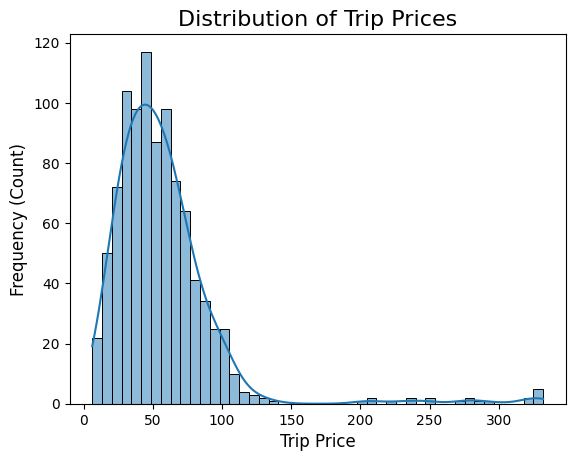

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["Trip_Price"], kde=True);

plt.title("Distribution of Trip Prices", fontsize=16)
plt.xlabel("Trip Price", fontsize=12)
plt.ylabel("Frequency (Count)", fontsize=12)
plt.savefig('../src/taxipred/Visualization/Distribution.png')
plt.show() 

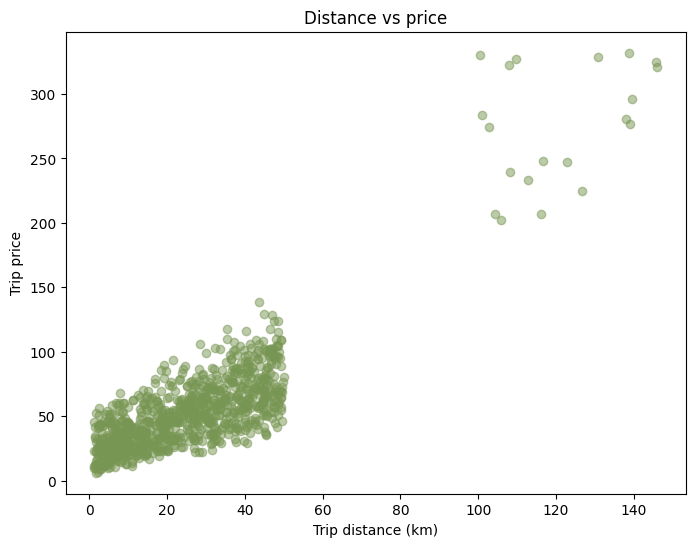

In [10]:
GREEN = '#789653'

plt.figure(figsize=(8, 6))
plt.scatter(df["Trip_Distance_km"], df["Trip_Price"], alpha=0.5, color = GREEN)
plt.xlabel("Trip distance (km)")
plt.ylabel("Trip price")
plt.title("Distance vs price")
plt.savefig('../src/taxipred/Visualization/scatter_Dist_price.png')
plt.show()



In [12]:
print("Missing Values")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_count': df.isnull().sum(),
    'Missing_percentage':(df.isnull().sum() /len(df)) *100
})
print(missing_data[missing_data['Missing_count']> 0])

Missing Values
                                      Column  Missing_count  \
Trip_Distance_km            Trip_Distance_km             50   
Time_of_Day                      Time_of_Day             50   
Day_of_Week                      Day_of_Week             50   
Passenger_Count              Passenger_Count             50   
Traffic_Conditions        Traffic_Conditions             50   
Weather                              Weather             50   
Base_Fare                          Base_Fare             50   
Per_Km_Rate                      Per_Km_Rate             50   
Per_Minute_Rate              Per_Minute_Rate             50   
Trip_Duration_Minutes  Trip_Duration_Minutes             50   
Trip_Price                        Trip_Price             49   

                       Missing_percentage  
Trip_Distance_km                      5.0  
Time_of_Day                           5.0  
Day_of_Week                           5.0  
Passenger_Count                       5.0  
Traffic_

### NonNull data

In [14]:
df_clean = df.dropna()
df_clean

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
12,41.79,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.1328
14,9.91,Evening,Weekday,2.0,High,Clear,2.32,1.26,0.34,41.72,28.9914
...,...,...,...,...,...,...,...,...,...,...,...
990,40.17,Evening,Weekday,3.0,Low,Clear,3.81,0.66,0.42,62.66,56.6394
992,14.34,Afternoon,Weekday,1.0,Medium,Clear,3.23,1.01,0.29,45.07,30.7837
994,18.69,Evening,Weekday,3.0,Medium,Clear,4.90,1.79,0.17,79.41,51.8548
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049


In [16]:
# Numerical features
import numpy as np

numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumerical Features Statistics:")
print(df_clean[numerical_cols].describe())

# Categorical features
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Features:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_clean[col].value_counts())


Numerical Features Statistics:
       Trip_Distance_km  Passenger_Count   Base_Fare  Per_Km_Rate  \
count        562.000000       562.000000  562.000000   562.000000   
mean          27.772941         2.533808    3.509893     1.219858   
std           21.153175         1.108915    0.871082     0.430351   
min            1.270000         1.000000    2.010000     0.500000   
25%           13.135000         2.000000    2.722500     0.840000   
50%           26.420000         3.000000    3.545000     1.200000   
75%           38.827500         4.000000    4.260000     1.580000   
max          146.067047         4.000000    5.000000     2.000000   

       Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price  
count       562.000000             562.000000  562.000000  
mean          0.288221              61.825089   57.663525  
std           0.114834              32.128436   43.958741  
min           0.100000               5.010000    6.126900  
25%           0.190000              36.530000 

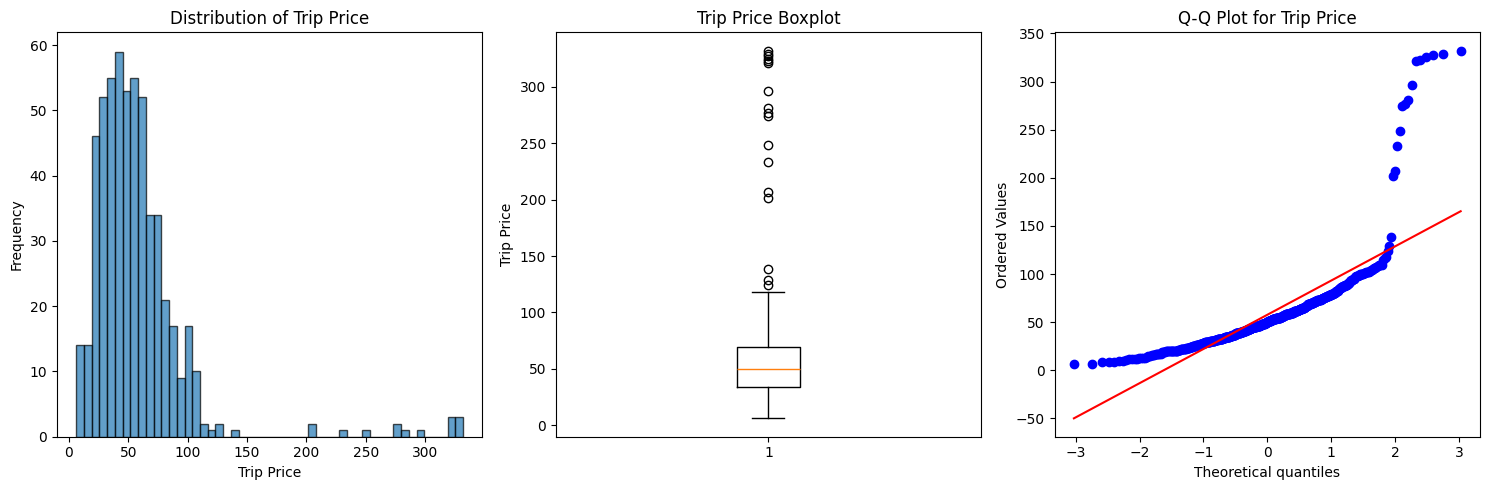

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_clean['Trip_Price'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Trip Price')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Price')

plt.subplot(1, 3, 2)
plt.boxplot(df_clean['Trip_Price'])
plt.ylabel('Trip Price')
plt.title('Trip Price Boxplot')

plt.subplot(1, 3, 3)
from scipy import stats
stats.probplot(df_clean['Trip_Price'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Trip Price')

plt.tight_layout()
plt.savefig('../src/taxipred/Visualization/trip_price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

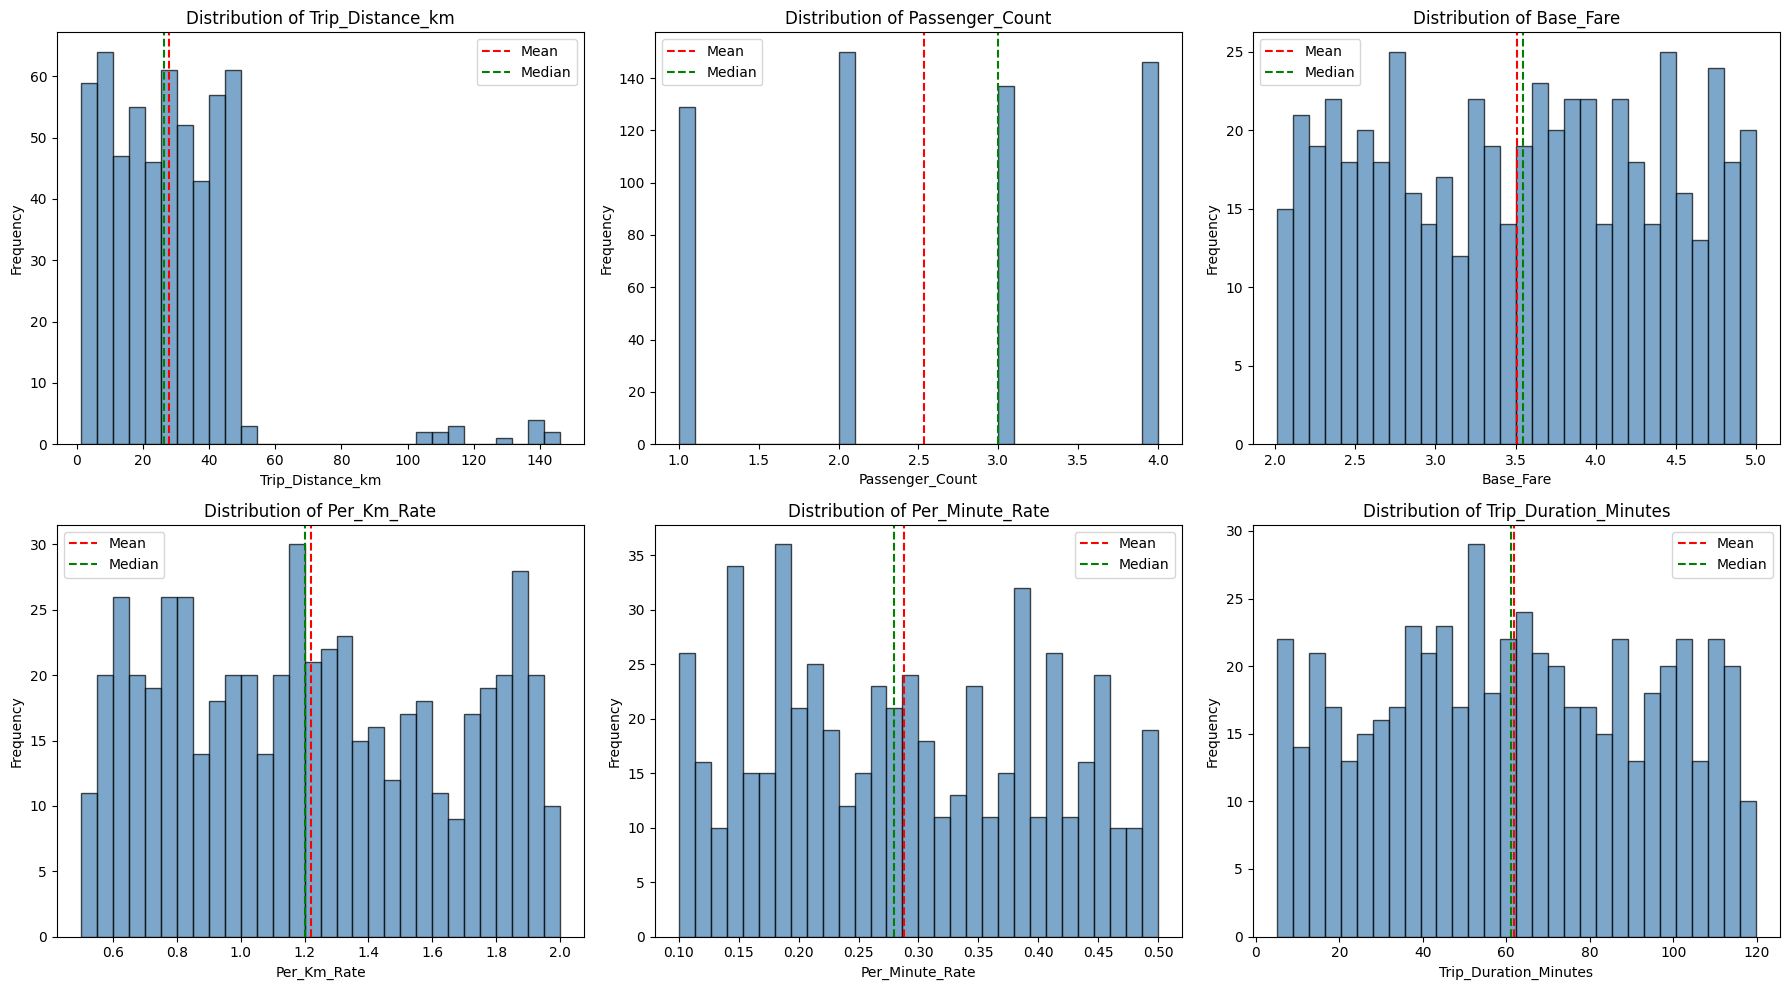

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

numerical_features = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 
                     'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df_clean[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].axvline(df_clean[col].mean(), color='red', linestyle='--', label='Mean')
    axes[idx].axvline(df_clean[col].median(), color='green', linestyle='--', label='Median')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('../src/taxipred/Visualization/numerical_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


Correlation with Trip Price:
Trip_Price               1.000000
Trip_Distance_km         0.862965
Per_Km_Rate              0.278268
Trip_Duration_Minutes    0.221717
Per_Minute_Rate          0.110967
Base_Fare                0.030897
Passenger_Count          0.015793
Name: Trip_Price, dtype: float64


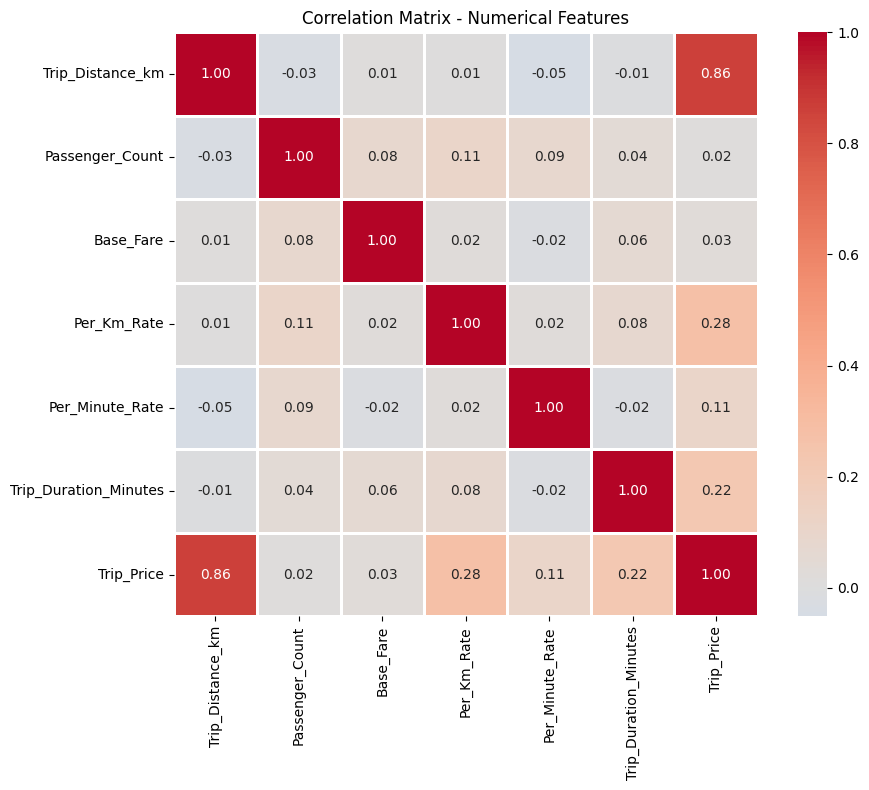

In [ ]:
# this shows that trip price and trip distance km has biggest correlation

print("\nCorrelation with Trip Price:")
correlations = df_clean[numerical_cols].corr()['Trip_Price'].sort_values(ascending=False)
print(correlations)

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix - Numerical Features')
plt.tight_layout()
plt.savefig('../src/taxipred/Visualization/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
print("\nOutlier Analysis (Using IQR Method):")
for col in numerical_features + ['Trip_Price']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df_clean)*100:.2f}%)")


Outlier Analysis (Using IQR Method):
Trip_Distance_km: 14 outliers (2.49%)
Passenger_Count: 0 outliers (0.00%)
Base_Fare: 0 outliers (0.00%)
Per_Km_Rate: 0 outliers (0.00%)
Per_Minute_Rate: 0 outliers (0.00%)
Trip_Duration_Minutes: 0 outliers (0.00%)
Trip_Price: 17 outliers (3.02%)
